# A minimal logic example

This example takes an input value and performs an exclusive or with the value `0xaa`, or the bit sequence `10101010` (MSB first).

# Minimallogik

Das folgende Beispiel erfasst einen Eingangswert und führt eine Exklusiv-OR Operation mit dem Wert `0xaa` (Bitsequenz `10101010`, höchst-signifikantes Bit zuerst)

In [1]:
from myhdl import *

@block
def test(clk, a, b):
    @always_comb
    def xor_assign():
        b.next = a ^ 0xaa

    return instances()

Let us directly infer this logic into a design:

Wir synthetisieren diese Beschreibung direkt in ein Design:

In [2]:
from myhdl.conversion import yshelper

clk = Signal(bool())
v, q = [ Signal(intbv()[8:]) for i in range(2) ]

design = yshelper.Design("test")
inst = test(clk, v, q)
inst.convert("yosys_module", design, name="test", trace=True)

CREATE Module: 'test'
Adding module with name: test_1_8_8
CONVERT_RTL tree >>>>>> 'TEST_XOR_ASSIGN' 
DONE instancing submodules


### RTL display

To display the synthesized logic circuit, we convert the design to a SVG image. By default, this displays the top level module circuits.

### Schematische Anzeige

Um den synthetisierten Schaltkreis als Schema anzuzeigen, konvertieren wir das Design in eine SVG-Grafik wie folgt. Grundsätzlich wird immer das oberste Element in der Hierarchie ('top level') angezeigt.

Generating RTL image...
Display...


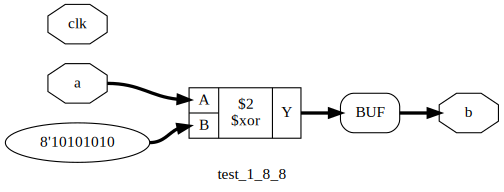

In [3]:
from ys_aux import to_svg

display(to_svg(design, "", 75))

So, the synthesis translates the 'python formula' into a hardware element. On the gate level, the `$xor` black box would look as follows:

Die Synthese übersetzt also die Python-Formel in ein Hardware-Element. Auf Gatter-Ebene würde das oben schematische Element `$xor` wie folgt aussehen:

![XOR gate](https://www.electronicshub.org/wp-content/uploads/2015/07/exor-equivalent-circuit.jpg)